# REQUIREMENTS

# Data analysis and modeling assignment

- Consider yourself a Data Scientist in Utopia Analytics, where we create models for user content classification based on customers' data.

- You are provided with files that contain the same data set in compressed JSONLines (data.jsonl.gz) and CSV (data.csv.gz) formats.

- The classification task is to predict the label (A or B) based on a sparse feature vector (fields x01 - xNN).

- In addition, the data set includes some meta data for each row: author (the one who produce inputs), annotator (people who sare giving the label), and timestamp.

- Process and analyze the provided data in terminal, Python, or with other tools.

- Try to get results quickly, but be ready to provide more accurate results.

## Task 1

- Implement and train a classifier that predicts the label from the features.

- Use as quick and simple an approach as you can, but mention some ways to improve on it.

- Report the results using some appropriate scores.

- Provide also the program code for your implementation.

## Task 2

- Explore the data in whatever tools you are proficient with (Python/Pandas, R, Excel, etc.) and try to find issues that may impair the classification accuracy.

- Report what you found and how (you can include e.g. screenshots, tables, plots, and code).

- If you have any remaining ideas that you did not have time to test, mention also those.

## Task 3

- Try to fix at least one of the issues you found in Task 2 from the data

- Repeat the classification task

- Analyse and report the effect on the results.

## Online Colab Notebook
The study notebook can be viewed online via Google Colab

The final report/assignment can be accessed online via Google Colab original file located at [Google Colab Notebook Link](https://colab.research.google.com/drive/1p0C1fxaPuQ2fF0wQ1E4WzT74fiqDTb8v?usp=sharing)

Please access the link above to view the comprehensive analysis including data implementations, observation notes, tables, plots, and code

## Pipeline

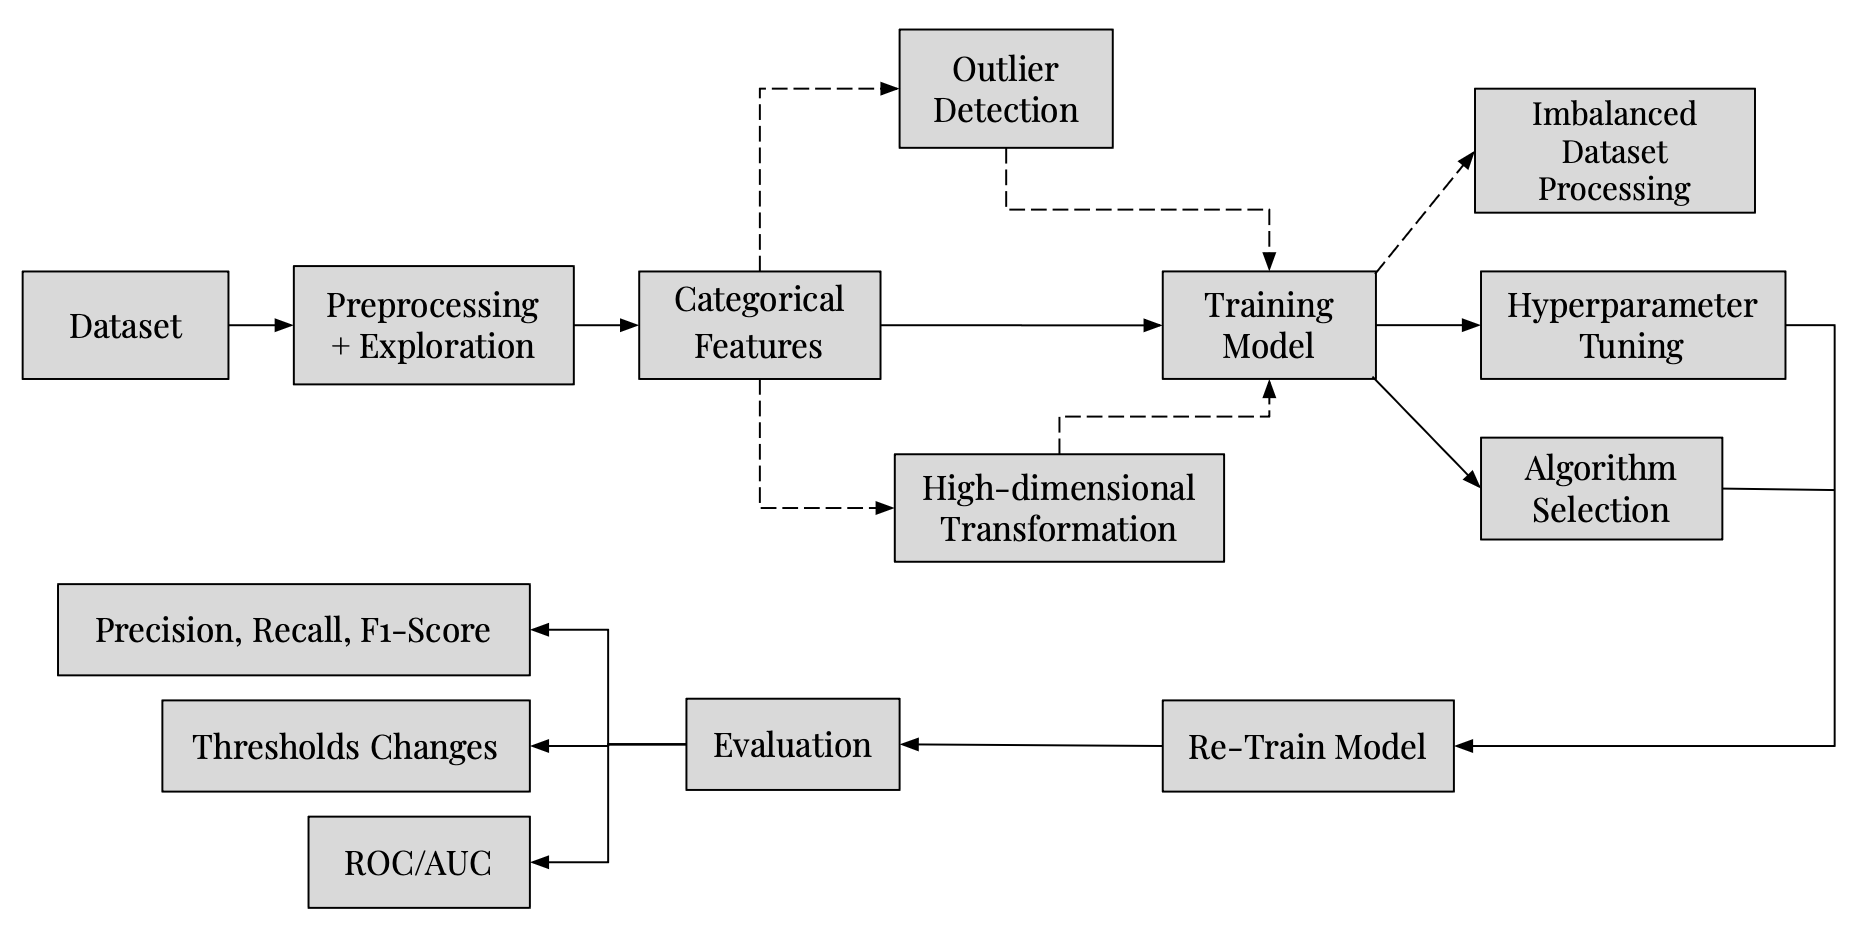

In [ ]:
import numpy as np
import pandas as pd
import datetime
import copy
import plotly.express as px
import plotly.graph_objects as go
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable = True, theme = 'pearl', offline = True)
from scipy import stats
from plotly.offline import iplot, init_notebook_mode
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

In [ ]:
#from google.colab import data_table
#data_table.enable_dataframe_formatter()

In [ ]:
#import io
#from google.colab import files

#uploaded = files.upload()

In [ ]:
import csv
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls /content/drive/MyDrive/Data

data_utopia.csv  data_utopia.jsonl


In [ ]:
df= pd.read_csv('/content/drive/My Drive/Data/data_utopia.csv', sep=',')

In [ ]:
df

,Unnamed: 0,x00,x01,x02,x03,x04,x05,x06,x07,x08,...,x14,x15,x16,x17,x18,x19,timestamp,label,author,annotator
0,0,0.067797,0.000000,0.000000,0.000000,0.033898,0.135593,0.033898,0.000000,0.000000,...,0.033898,0.000000,0.000000,0.000000,0.000000,0.000000,2022-03-08T02:44:23.150795+03:00,A,125,2
1,1,0.051282,0.051282,0.128205,0.051282,0.051282,0.000000,0.076923,0.000000,0.051282,...,0.000000,0.000000,0.307692,0.076923,0.000000,0.000000,2022-03-08T02:28:18.591671+03:00,A,470,1
2,2,0.000000,0.039216,0.058824,0.000000,0.117647,0.117647,0.039216,0.098039,0.039216,...,0.019608,0.000000,0.176471,0.000000,0.039216,0.000000,2022-03-08T02:23:09.812232+03:00,A,292,6
3,3,0.020408,0.040816,0.000000,0.224490,0.061224,0.122449,0.102041,0.000000,0.000000,...,0.000000,0.000000,0.142857,0.000000,0.040816,0.163265,2022-03-08T01:33:12.334032+03:00,A,148,14
4,4,0.097561,0.146341,0.292683,0.073171,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.024390,0.000000,0.048780,0.000000,0.048780,2022-03-08T01:22:37.514600+03:00,A,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,0.028571,0.028571,0.057143,0.028571,0.057143,0.000000,0.257143,0.000000,0.000000,...,0.000000,0.171429,0.000000,0.000000,0.000000,0.000000,2022-06-21T15:57:16.479117+03:00,A,486,11
19996,19996,0.191489,0.000000,0.000000,0.021277,0.000000,0.000000,0.000000,0.000000,0.234043,...,0.000000,0.191489,0.000000,0.042553,0.127660,0.127660,2022-06-21T15:49:03.451651+03:00,A,426,13
19997,19997,0.000000,0.000000,0.000000,0.000000,0.019231,0.019231,0.000000,0.000000,0.038462,...,0.019231,0.807692,0.000000,0.000000,0.038462,0.000000,2022-06-21T15:48:21.934686+03:00,A,122,2
19998,19998,0.139535,0.000000,0.000000,0.093023,0.000000,0.000000,0.000000,0.162791,0.000000,...,0.000000,0.000000,0.139535,0.000000,0.023256,0.046512,2022-06-21T15:45:29.612891+03:00,A,384,10


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df, *['Unnamed: 0'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df, *['x00'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df, *['x01'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df, *['x02'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df, *['Unnamed: 0'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df, *['x00'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df, *['x01'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df, *['x02'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df, *['label'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df, *[[['Unnamed: 0', 'x00'], ['x00', 'x01'], ['x01', 'x02'], ['x02', 'x03']]], **{})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df, *['Unnamed: 0', 'label'], **{'inner': 'box'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df, *['x00', 'label'], **{'inner': 'box'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df, *['x01', 'label'], **{'inner': 'box'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df, *['x02', 'label'], **{'inner': 'box'})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df, *['Unnamed: 0', 'x00', 'label'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df, *['Unnamed: 0', 'x01', 'label'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df, *['Unnamed: 0', 'x02', 'label'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df, *['Unnamed: 0', 'x03', 'label'], **{})
chart

In [ ]:
# Drop 1st index column
df2 = df.drop(df.columns[0],axis=1)
df2

,x00,x01,x02,x03,x04,x05,x06,x07,x08,x09,...,x14,x15,x16,x17,x18,x19,timestamp,label,author,annotator
0,0.067797,0.000000,0.000000,0.000000,0.033898,0.135593,0.033898,0.000000,0.000000,0.016949,...,0.033898,0.000000,0.000000,0.000000,0.000000,0.000000,2022-03-08T02:44:23.150795+03:00,A,125,2
1,0.051282,0.051282,0.128205,0.051282,0.051282,0.000000,0.076923,0.000000,0.051282,0.128205,...,0.000000,0.000000,0.307692,0.076923,0.000000,0.000000,2022-03-08T02:28:18.591671+03:00,A,470,1
2,0.000000,0.039216,0.058824,0.000000,0.117647,0.117647,0.039216,0.098039,0.039216,0.000000,...,0.019608,0.000000,0.176471,0.000000,0.039216,0.000000,2022-03-08T02:23:09.812232+03:00,A,292,6
3,0.020408,0.040816,0.000000,0.224490,0.061224,0.122449,0.102041,0.000000,0.000000,0.020408,...,0.000000,0.000000,0.142857,0.000000,0.040816,0.163265,2022-03-08T01:33:12.334032+03:00,A,148,14
4,0.097561,0.146341,0.292683,0.073171,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.024390,0.000000,0.048780,0.000000,0.048780,2022-03-08T01:22:37.514600+03:00,A,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0.028571,0.028571,0.057143,0.028571,0.057143,0.000000,0.257143,0.000000,0.000000,0.000000,...,0.000000,0.171429,0.000000,0.000000,0.000000,0.000000,2022-06-21T15:57:16.479117+03:00,A,486,11
19996,0.191489,0.000000,0.000000,0.021277,0.000000,0.000000,0.000000,0.000000,0.234043,0.000000,...,0.000000,0.191489,0.000000,0.042553,0.127660,0.127660,2022-06-21T15:49:03.451651+03:00,A,426,13
19997,0.000000,0.000000,0.000000,0.000000,0.019231,0.019231,0.000000,0.000000,0.038462,0.000000,...,0.019231,0.807692,0.000000,0.000000,0.038462,0.000000,2022-06-21T15:48:21.934686+03:00,A,122,2
19998,0.139535,0.000000,0.000000,0.093023,0.000000,0.000000,0.000000,0.162791,0.000000,0.000000,...,0.000000,0.000000,0.139535,0.000000,0.023256,0.046512,2022-06-21T15:45:29.612891+03:00,A,384,10


In [ ]:
#Let's check data quality, null values and data types
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   x00        20000 non-null  float64
 1   x01        20000 non-null  float64
 2   x02        20000 non-null  float64
 3   x03        20000 non-null  float64
 4   x04        20000 non-null  float64
 5   x05        20000 non-null  float64
 6   x06        20000 non-null  float64
 7   x07        20000 non-null  float64
 8   x08        20000 non-null  float64
 9   x09        20000 non-null  float64
 10  x10        20000 non-null  float64
 11  x11        20000 non-null  float64
 12  x12        20000 non-null  float64
 13  x13        20000 non-null  float64
 14  x14        20000 non-null  float64
 15  x15        20000 non-null  float64
 16  x16        20000 non-null  float64
 17  x17        20000 non-null  float64
 18  x18        20000 non-null  float64
 19  x19        20000 non-null  float64
 20  timest

In [ ]:
#Let's check general information about the dataset distribution
df2.describe()

,x00,x01,x02,x03,x04,x05,x06,x07,x08,x09,...,x12,x13,x14,x15,x16,x17,x18,x19,author,annotator
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,0.044022,0.046883,0.060798,0.051506,0.047315,0.055398,0.053666,0.054706,0.044023,0.049226,...,0.059532,0.063349,0.033831,0.049136,0.034557,0.058293,0.047645,0.042815,250.440050,7.978200
std,0.065655,0.076402,0.120524,0.082059,0.084212,0.094347,0.088282,0.092226,0.075671,0.090870,...,0.093840,0.094897,0.063455,0.105124,0.063477,0.103486,0.076235,0.080530,143.738578,5.000417
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,122.000000,3.000000
50%,0.018868,0.018182,0.000000,0.017857,0.016393,0.016667,0.018868,0.018868,0.014925,0.000000,...,0.019608,0.021739,0.000000,0.000000,0.000000,0.018519,0.019231,0.000000,244.000000,8.000000
75%,0.062500,0.062500,0.065217,0.076923,0.055556,0.068966,0.074074,0.069767,0.054545,0.052632,...,0.080000,0.084567,0.040816,0.054545,0.040816,0.071429,0.064001,0.048780,385.000000,13.000000
max,0.547619,0.586957,0.755556,0.789474,0.681818,0.648649,0.787234,0.828571,0.720930,0.653061,...,0.666667,0.653061,0.536585,0.833333,0.500000,0.804878,0.679245,0.727273,500.000000,16.000000


Note:
- count: 20k data points
- mean: average value
- std: measure of the spread of the data around the mean
- min: the minimum value in the dataset
- 25%: the LOWEST 25% of the data from the rest
- 50%: the median, the middle value of the dataset when it is ordered from smallest to largest.
- 75%: separates the lowest 75% of the data from the top 25%.
- Max: the maximum value

#### Missing data

In [ ]:
# Let's check missing data
df2.isnull().sum()

x00          0
x01          0
x02          0
x03          0
x04          0
x05          0
x06          0
x07          0
x08          0
x09          0
x10          0
x11          0
x12          0
x13          0
x14          0
x15          0
x16          0
x17          0
x18          0
x19          0
timestamp    0
label        0
author       0
annotator    0
dtype: int64

<Axes: >

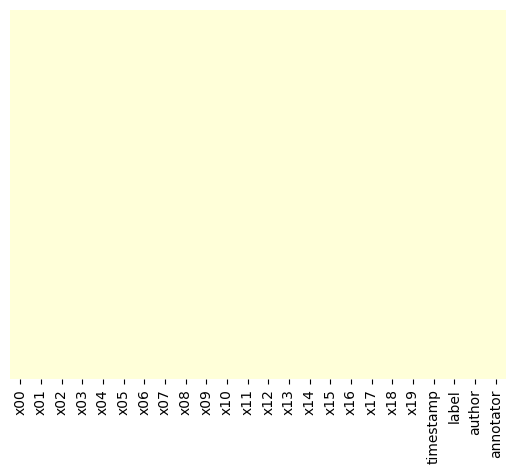

In [ ]:
sns.heatmap(df2.isnull(), yticklabels=False, cbar=False, cmap="YlGnBu")

##### Observation  1
Our data doesn't have any missing values. We could move to the next step.

#### Preprocess time series

Let's preprocess the time series data in a way that computer could understand and analyse

In [ ]:
df2['timestamp'] = pd.to_datetime(df2['timestamp'])

In [ ]:
df2.set_index('timestamp', inplace=True)

In [ ]:
df2['day_of_week'] = df2.index.dayofweek

In [ ]:
df2['hour_of_day'] = df2.index.hour

In [ ]:
df2

,x00,x01,x02,x03,x04,x05,x06,x07,x08,x09,...,x15,x16,x17,x18,x19,label,author,annotator,day_of_week,hour_of_day
timestamp,,,,,,,,,,,,,,,,,,,,,
2022-03-08 02:44:23.150795+03:00,0.067797,0.000000,0.000000,0.000000,0.033898,0.135593,0.033898,0.000000,0.000000,0.016949,...,0.000000,0.000000,0.000000,0.000000,0.000000,A,125,2,1,2
2022-03-08 02:28:18.591671+03:00,0.051282,0.051282,0.128205,0.051282,0.051282,0.000000,0.076923,0.000000,0.051282,0.128205,...,0.000000,0.307692,0.076923,0.000000,0.000000,A,470,1,1,2
2022-03-08 02:23:09.812232+03:00,0.000000,0.039216,0.058824,0.000000,0.117647,0.117647,0.039216,0.098039,0.039216,0.000000,...,0.000000,0.176471,0.000000,0.039216,0.000000,A,292,6,1,2
2022-03-08 01:33:12.334032+03:00,0.020408,0.040816,0.000000,0.224490,0.061224,0.122449,0.102041,0.000000,0.000000,0.020408,...,0.000000,0.142857,0.000000,0.040816,0.163265,A,148,14,1,1
2022-03-08 01:22:37.514600+03:00,0.097561,0.146341,0.292683,0.073171,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.024390,0.000000,0.048780,0.000000,0.048780,A,1,8,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-21 15:57:16.479117+03:00,0.028571,0.028571,0.057143,0.028571,0.057143,0.000000,0.257143,0.000000,0.000000,0.000000,...,0.171429,0.000000,0.000000,0.000000,0.000000,A,486,11,1,15
2022-06-21 15:49:03.451651+03:00,0.191489,0.000000,0.000000,0.021277,0.000000,0.000000,0.000000,0.000000,0.234043,0.000000,...,0.191489,0.000000,0.042553,0.127660,0.127660,A,426,13,1,15
2022-06-21 15:48:21.934686+03:00,0.000000,0.000000,0.000000,0.000000,0.019231,0.019231,0.000000,0.000000,0.038462,0.000000,...,0.807692,0.000000,0.000000,0.038462,0.000000,A,122,2,1,15


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df2, *['x00'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df2, *['x01'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df2, *['x02'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df2, *['x03'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df2, *['x00'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df2, *['x01'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df2, *['x02'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df2, *['x03'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df2, *['label'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df2, *[[['x00', 'x01'], ['x01', 'x02'], ['x02', 'x03'], ['x03', 'x04']]], **{})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df2, *['x00', 'label'], **{'inner': 'box'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df2, *['x01', 'label'], **{'inner': 'box'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df2, *['x02', 'label'], **{'inner': 'box'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df2, *['x03', 'label'], **{'inner': 'box'})
chart

#### Some Other EDA

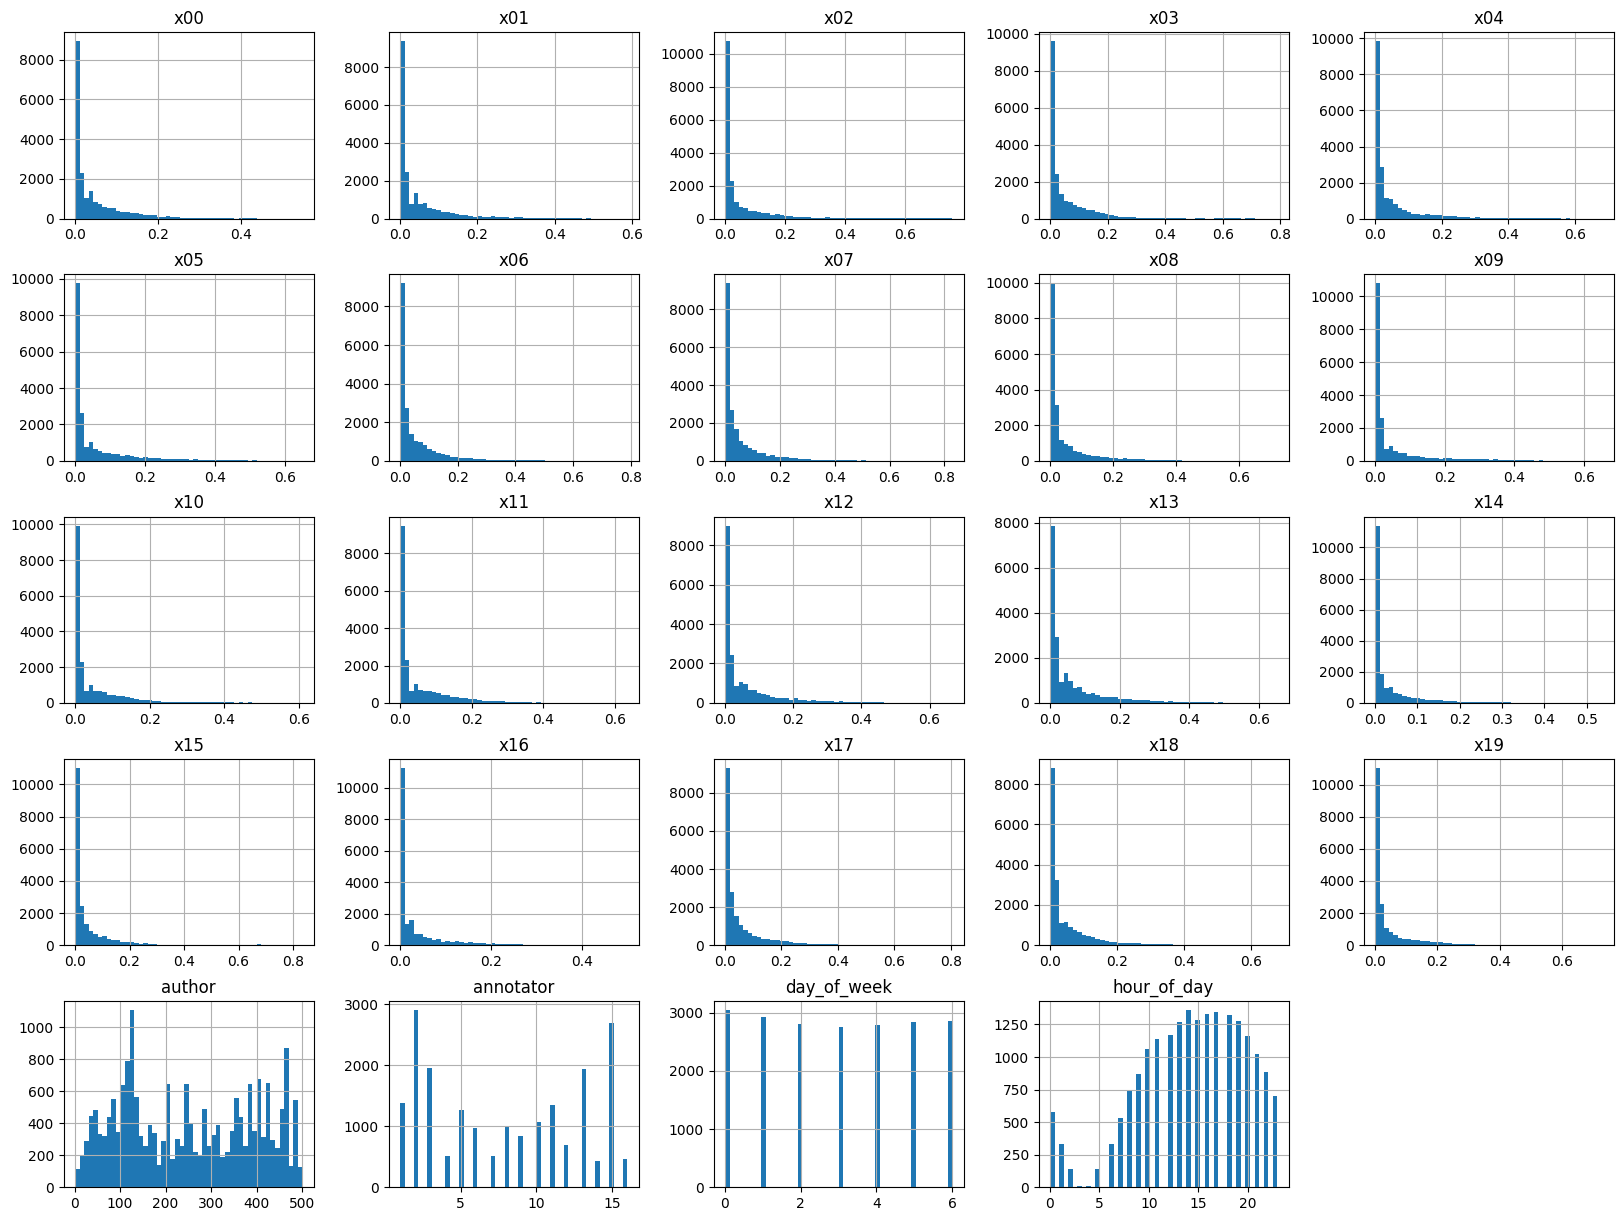

In [ ]:
# All Feature Overview
df2.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
df3 = df2[df2.columns[20:25]]
df3.head(30)

,timestamp,label,author,annotator
0,2022-03-08T02:44:23.150795+03:00,A,125,2
1,2022-03-08T02:28:18.591671+03:00,A,470,1
2,2022-03-08T02:23:09.812232+03:00,A,292,6
3,2022-03-08T01:33:12.334032+03:00,A,148,14
4,2022-03-08T01:22:37.514600+03:00,A,1,8
5,2022-03-08T00:32:27.004651+03:00,B,462,3
6,2022-03-08T00:22:28.613243+03:00,A,318,10
7,2022-03-08T00:10:46.936056+03:00,A,463,2
8,2022-03-07T23:53:02.155197+03:00,A,405,7
9,2022-03-07T23:22:54.338813+03:00,B,422,5


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['author'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_1, *['annotator'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_2, *['author'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_3, *['annotator'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_4, *['label'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_5, *[[['author', 'annotator']]], **{})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_6, *['author', 'label'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_7, *['annotator', 'label'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_8, *['timestamp', 'author', 'label'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_9, *['timestamp', 'annotator', 'label'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_10, *['timestamp', 'count()', 'label'], **{})
chart

##### Observation 2
Metadata Intepretation
- hour of day: high density of content has been consumed between 10.00 and 20.00 during the day. The peak consuming time is recorded from 14.00 - 19.00, which indicates the most common time that users ultilize for content consumption. The lowest time period for content intake is from around 1.00 - 7.00, which recommends lower business attention related to user content consumption.
- day of the week: high density of content consumption is observed from Thursday until Sunday, which indicates that weekends are the most content-consuming time from users and the most common time users ultilize for consumping content. The lowest time of the week for content consumption is Tuesday and Wednesday, which indicates that users tend to use that time periods for other activities than consuming content.
- Author and Annotator: requires more context information to interpret the data.

<ipython-input-17-f92d3dfdc5d4>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

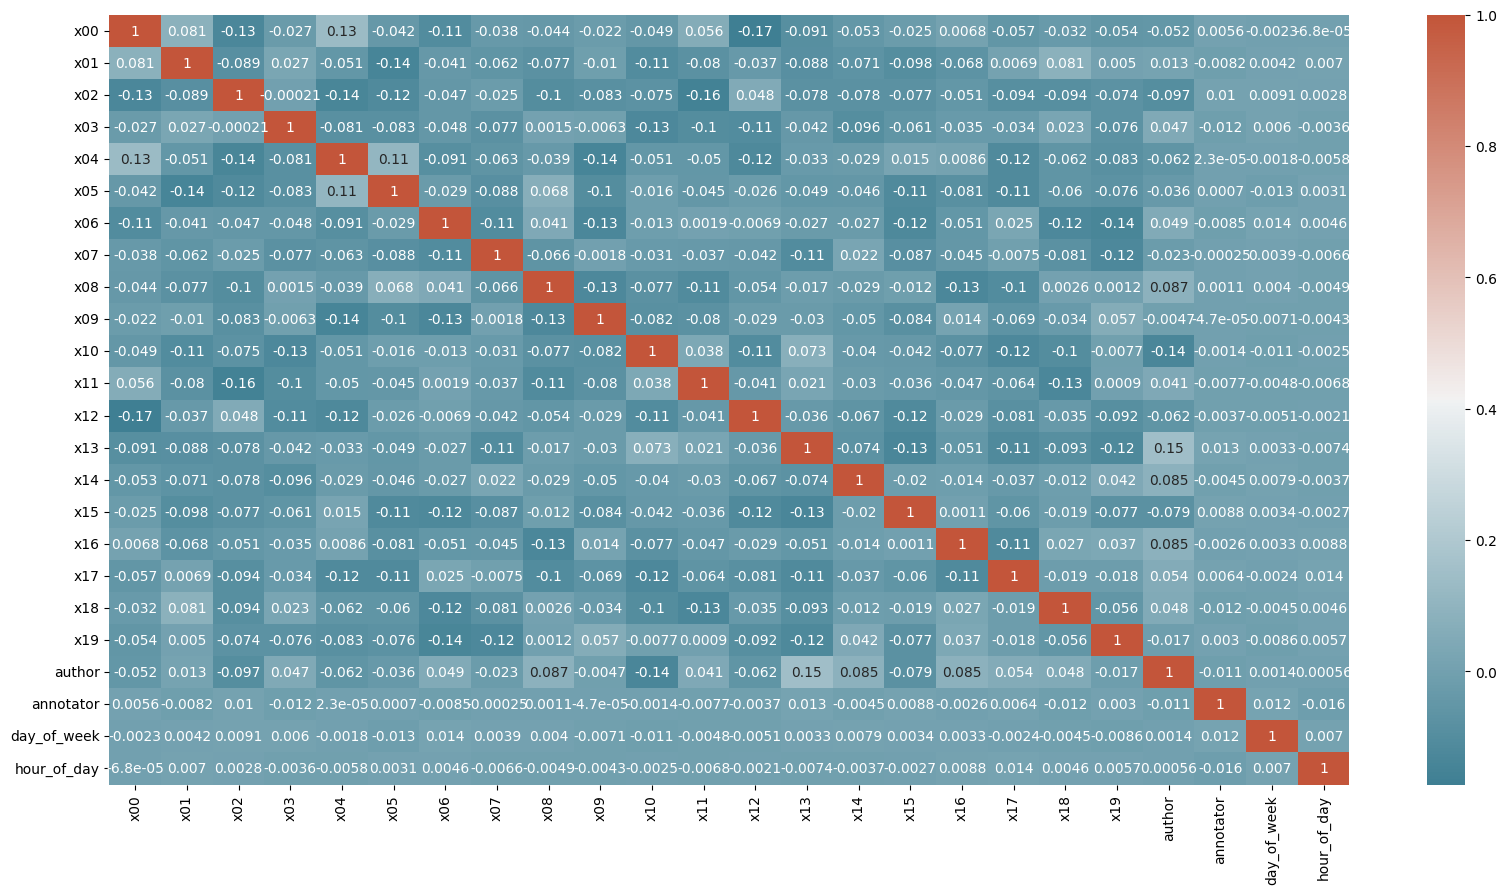

In [ ]:
# Correlation Matrix
corr = df2.corr()
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, annot = True, cmap = sns.diverging_palette(220, 20, as_cmap=True))

#### Categorical Features

For features such as Label which contain string values, they needed to be converted into dummy variables such that model can interpret them. There is no need to encode explicitly the first level of the categories.

In [ ]:
# Substitute the categories A and B of the column "label" for integers
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df2.label)


LabelEncoder()

In [ ]:
df2["label"] = le.fit_transform(df["label"])
df2

,x00,x01,x02,x03,x04,x05,x06,x07,x08,x09,...,x15,x16,x17,x18,x19,label,author,annotator,day_of_week,hour_of_day
timestamp,,,,,,,,,,,,,,,,,,,,,
2022-03-08 02:44:23.150795+03:00,0.067797,0.000000,0.000000,0.000000,0.033898,0.135593,0.033898,0.000000,0.000000,0.016949,...,0.000000,0.000000,0.000000,0.000000,0.000000,0,125,2,1,2
2022-03-08 02:28:18.591671+03:00,0.051282,0.051282,0.128205,0.051282,0.051282,0.000000,0.076923,0.000000,0.051282,0.128205,...,0.000000,0.307692,0.076923,0.000000,0.000000,0,470,1,1,2
2022-03-08 02:23:09.812232+03:00,0.000000,0.039216,0.058824,0.000000,0.117647,0.117647,0.039216,0.098039,0.039216,0.000000,...,0.000000,0.176471,0.000000,0.039216,0.000000,0,292,6,1,2
2022-03-08 01:33:12.334032+03:00,0.020408,0.040816,0.000000,0.224490,0.061224,0.122449,0.102041,0.000000,0.000000,0.020408,...,0.000000,0.142857,0.000000,0.040816,0.163265,0,148,14,1,1
2022-03-08 01:22:37.514600+03:00,0.097561,0.146341,0.292683,0.073171,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.024390,0.000000,0.048780,0.000000,0.048780,0,1,8,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-21 15:57:16.479117+03:00,0.028571,0.028571,0.057143,0.028571,0.057143,0.000000,0.257143,0.000000,0.000000,0.000000,...,0.171429,0.000000,0.000000,0.000000,0.000000,0,486,11,1,15
2022-06-21 15:49:03.451651+03:00,0.191489,0.000000,0.000000,0.021277,0.000000,0.000000,0.000000,0.000000,0.234043,0.000000,...,0.191489,0.000000,0.042553,0.127660,0.127660,0,426,13,1,15
2022-06-21 15:48:21.934686+03:00,0.000000,0.000000,0.000000,0.000000,0.019231,0.019231,0.000000,0.000000,0.038462,0.000000,...,0.807692,0.000000,0.000000,0.038462,0.000000,0,122,2,1,15


In [ ]:
#Dropping features which are irrelevant or difficult to pass as input to the model
df2.drop(['hour_of_day', 'author', 'annotator','day_of_week'],axis=1,inplace=True)

In [ ]:
df2

,x00,x01,x02,x03,x04,x05,x06,x07,x08,x09,...,x11,x12,x13,x14,x15,x16,x17,x18,x19,label
timestamp,,,,,,,,,,,,,,,,,,,,,
2022-03-08 02:44:23.150795+03:00,0.067797,0.000000,0.000000,0.000000,0.033898,0.135593,0.033898,0.000000,0.000000,0.016949,...,0.135593,0.000000,0.203390,0.033898,0.000000,0.000000,0.000000,0.000000,0.000000,0
2022-03-08 02:28:18.591671+03:00,0.051282,0.051282,0.128205,0.051282,0.051282,0.000000,0.076923,0.000000,0.051282,0.128205,...,0.000000,0.000000,0.025641,0.000000,0.000000,0.307692,0.076923,0.000000,0.000000,0
2022-03-08 02:23:09.812232+03:00,0.000000,0.039216,0.058824,0.000000,0.117647,0.117647,0.039216,0.098039,0.039216,0.000000,...,0.078431,0.117647,0.058824,0.019608,0.000000,0.176471,0.000000,0.039216,0.000000,0
2022-03-08 01:33:12.334032+03:00,0.020408,0.040816,0.000000,0.224490,0.061224,0.122449,0.102041,0.000000,0.000000,0.020408,...,0.000000,0.061224,0.000000,0.000000,0.000000,0.142857,0.000000,0.040816,0.163265,0
2022-03-08 01:22:37.514600+03:00,0.097561,0.146341,0.292683,0.073171,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.073171,0.000000,0.000000,0.024390,0.000000,0.048780,0.000000,0.048780,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-21 15:57:16.479117+03:00,0.028571,0.028571,0.057143,0.028571,0.057143,0.000000,0.257143,0.000000,0.000000,0.000000,...,0.000000,0.171429,0.200000,0.000000,0.171429,0.000000,0.000000,0.000000,0.000000,0
2022-06-21 15:49:03.451651+03:00,0.191489,0.000000,0.000000,0.021277,0.000000,0.000000,0.000000,0.000000,0.234043,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.191489,0.000000,0.042553,0.127660,0.127660,0
2022-06-21 15:48:21.934686+03:00,0.000000,0.000000,0.000000,0.000000,0.019231,0.019231,0.000000,0.000000,0.038462,0.000000,...,0.019231,0.000000,0.000000,0.019231,0.807692,0.000000,0.000000,0.038462,0.000000,0


Text(-12.555555555555555, 0.5, 'Frequencies of the 2 classes')

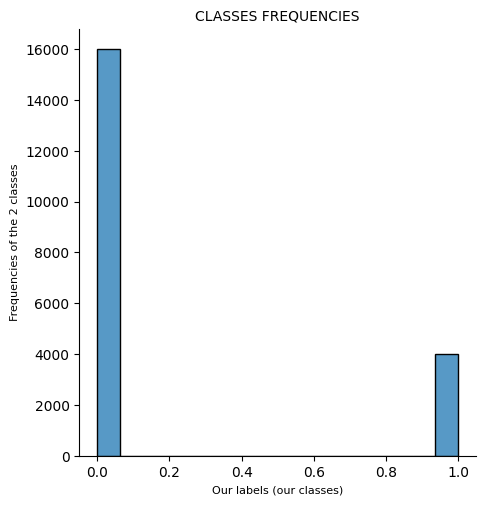

In [ ]:
# Plot histogram
sns.displot(data=df2, x='label')

# Write title and axis labels
plt.title('CLASSES FREQUENCIES', fontsize=10) #plot TITLE
plt.xlabel('Our labels (our classes)', fontsize=8) #x-axis label
plt.ylabel('Frequencies of the 2 classes', fontsize=8) #y-axis label

##### Observation  3
- Classification classes from the dataset are imblanced, which means it will affect the way how we inteprete the outcome results and the accuracy of the Classification model
- Since the dataset is highly imbalanced, our model may have a bias toward the majority class. As a result, cross-entropy and accuracy may not be the only metric to consider.
- We may need to use such metrics, for example, the  precision, recall, F1-score, and area under the ROC curve (AUC) to get a more comprehensive view of your model's performance.

#### Training Model

In [ ]:
X = df2.drop('label',axis=1)
y = df2['label']

In [ ]:
# We are going to use Random Forest Model to see the feature relationship's predictions
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

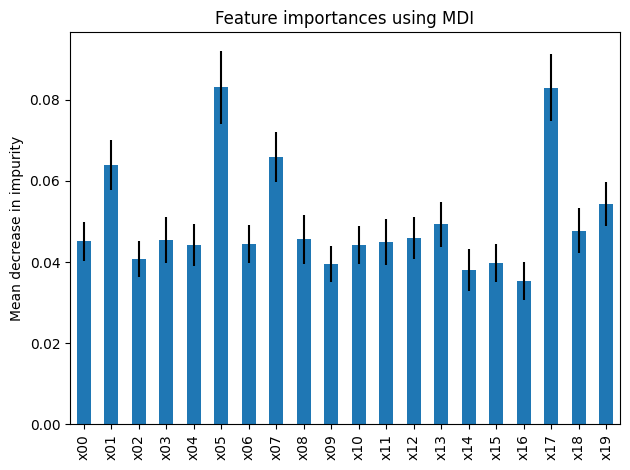

In [ ]:
forest_importances = pd.Series(importances, index=X.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [ ]:
train_pred = forest.predict(X_test)
train_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,train_pred))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      3188
           1       0.63      0.24      0.35       812

    accuracy                           0.82      4000
   macro avg       0.73      0.60      0.62      4000
weighted avg       0.79      0.82      0.78      4000



In [ ]:
scores = cross_val_score(forest, X, y)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.83175 0.8225  0.819   0.801   0.797  ]


In [ ]:
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Average cross-validation score: 0.81


##### Observation 4
1. Precision
- For class "0," 83% of the instances predicted as "0" were correct.
- For class "1," 63% of the instances predicted as "1" were correct.
- The precision for the positive class is approximately 63%, indicating that when the model predicts the positive class, it is correct about 63% of the time.
2. Recall
- For class "0," the model identified 96% of the actual instances of class "0."
- For class "1," the model identified only 24% of the actual instances of class "1."
- The recall for the positive class is approximately 24%, suggesting that the model correctly identifies about 24% of the actual positive instances.
3. F1-Score
- The F1-score for class "0" is 0.89, indicating a good balance between precision and recall for class "0."
- The F1-score for class "1" is 0.35, indicating that there is room for improvement in the trade-off between precision and recall for class "1."
- The F1 score for the positive class is approximately 0.35

In [ ]:
# Let us now analyze the confusion matrix of this model
from sklearn.metrics import confusion_matrix

# Calculate and print confusion matrix
cm = confusion_matrix(y_test,train_pred)

print('Confusion matrix:\n', cm)

Confusion matrix:
 [[3075  113]
 [ 617  195]]


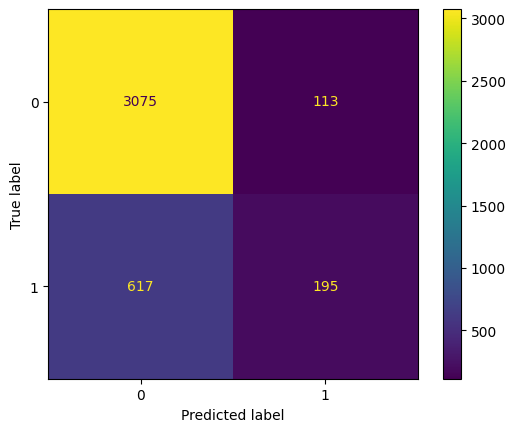

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

# Plot confusion matrix
cmd = ConfusionMatrixDisplay(cm)
cmd.plot()

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score


##### Observation 5
- In summary, the model's performance is evaluated based on these metrics:
  - True Positives (TP) = 195
  - False Positives (FP) = 113
  - True Negatives (TN) = 3075
  - False Negatives (FN) = 617
- The model has relatively high accuracy but lower precision and recall for the positive class
- The result suggests that the model may have a tendency to produce false positives and misses some of the actual positive instances
-  We may need to adjust the model or its threshold to optimize precision or recall as needed.

Let's check another model

In [ ]:
from sklearn import preprocessing
from sklearn import svm
from sklearn.svm import SVC

scaler = preprocessing.StandardScaler().fit(X_train)
X_train_transformed = scaler.transform(X_train)
clf = svm.SVC(C=1).fit(X_train_transformed, y_train)
X_test_transformed = scaler.transform(X_test)
clf.score(X_test_transformed, y_test)

0.8195

In [ ]:
y_pred = clf.predict(X_test_transformed)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.97      0.90      3188
           1       0.65      0.24      0.35       812

    accuracy                           0.82      4000
   macro avg       0.74      0.60      0.62      4000
weighted avg       0.80      0.82      0.79      4000



In [ ]:
# Let us now analyze the confusion matrix of this model
from sklearn.metrics import confusion_matrix

# Calculate and print confusion matrix
cm_2 = confusion_matrix(y_test,y_pred)

print('Confusion matrix:\n', cm_2)

Confusion matrix:
 [[3080  108]
 [ 614  198]]


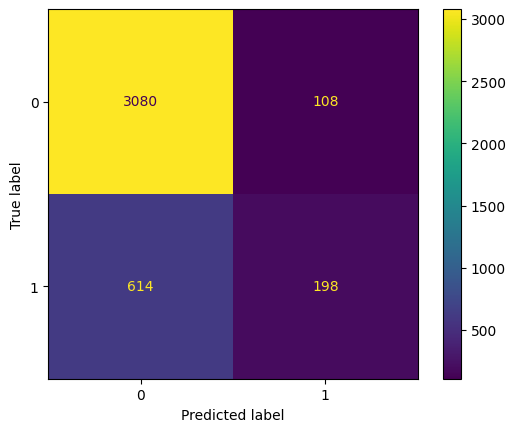

In [ ]:
# Plot confusion matrix
cmd_2 = ConfusionMatrixDisplay(cm_2)
cmd_2.plot()

##### Observation 6
- The results are not much different from the ones observed in the fist model
- To improve the model performance on imbalanced class, we can apply several strategies to address this issue and improve model performance, for example:
  - Hyperparameter Tuning: Incorrect hyperparameter settings for a classifier can impact its performance. Grid search or random search can be used to find optimal hyperparameters.
  - Resampling Techniques:
    - Oversampling the Minority Class: Increasing the number of instances in the minority class by duplicating existing samples or generating synthetic samples (e.g., using SMOTE - Synthetic Minority Over-sampling Technique) can balance the dataset.
    - Undersampling the Majority Class: Reducing the number of instances in the majority class by randomly selecting a subset of samples can also balance the dataset. Be cautious not to remove too many samples, as you might lose valuable information.
    - Combination of oversampling and undersampling (SMOTE + TOMEK LINKS)
  - Class Weights: Adjust the class weights in the model to give more importance to the minority class. Many classifiers allow us to assign different weights to different classes, emphasizing the importance of the minority class.
  - Different Algorithms: Use machine learning algorithms that are less sensitive to class imbalance
  - Threshold Adjustment: By default, classification algorithms use a threshold of 0.5 for binary classification. Adjusting this threshold can help achieve a better balance between precision and recall. We can optimize the threshold based on the problem's requirements.
  - Evaluation Metrics: Instead of accuracy, consider using evaluation metrics that are less affected by class imbalance, such as precision, recall, F1-score, ROC AUC, and PR AUC. These metrics provide a more comprehensive view of model performance.
  - Customized Loss Functions: Define custom loss functions that penalize misclassification of the minority class more severely.
  - etc.
- Below we will conduct experiment called Hyperparamenter Tunning to find the best hyperparamters that improve the model performance and try out other different classification algorithms to observe the data response. Eventually we will use such metrics, for example precision, recall, F1-score, ROC AUC, etc. to have a more comprehensive overview of the model performance.

#### Optimization

Let's use some techiniques to optimize the ML model

Find the best parameters on the validation set using gridsearch

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

clf_2 = make_pipeline(preprocessing.StandardScaler(), svm.SVC(C=1))
cross_val_score(clf_2, X, y)

array([0.833  , 0.823  , 0.823  , 0.7985 , 0.80425])

In [ ]:
print("Size of training set: {}, size of test set: {}".format(X_train.shape[0], X_test.shape[0]))

Size of training set: 16000, size of test set: 4000


In [ ]:
from sklearn.svm import SVC

# split data into train+validation set and test set
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, random_state=0)

# split train+validation set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)

print("Size of training set: {}\n size of validation set: {}\n size of test set:"
      " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

Size of training set: 11250
 size of validation set: 3750
 size of test set: 5000



In [ ]:
best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters,
        # train an SVC
        svm = SVC(gamma=gamma, C=C)
        # perform cross-validation
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        # compute mean cross-validation accuracy
        score = np.mean(scores)

        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

In [ ]:
# rebuild a model on the combined training and validation set
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)

test_score = svm.score(X_test, y_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))

Best score on validation set: 0.82
Best parameters:  {'C': 1, 'gamma': 10}
Test set score with best parameters: 0.82


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10,100],#,1000],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(SVC(), param_grid, cv=5)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
grid_search.fit(X_train, y_train)

print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}\n".format(grid_search.best_score_))
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Test set score: 0.82
Best parameters: {'C': 1, 'gamma': 10}
Best cross-validation score: 0.82

Best estimator:
SVC(C=1, gamma=10)


##### Observation 7
- After using GridSearch to find the best parameters on the validation set, the best parameters we could find for SVM model is { 'C': 1, 'gamma': 10 }
- We could check the Heatmap to observe  and compare the performance of a support vector machine (SVM) classifier with different hyperparameter settings

Plot a Heatmap of the Parameters

In [ ]:
pip install mglearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 8.6 MB/s eta 0:00:00


In [ ]:
import mglearn

# convert to DataFrame
results = pd.DataFrame(grid_search.cv_results_)
# show the first 5 rows
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.404148,0.655575,0.768322,0.139258,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.8,0.8,0.799667,0.799667,0.799667,0.7998,0.000163,10
1,2.103908,0.471154,0.699663,0.006034,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.8,0.8,0.799667,0.799667,0.799667,0.7998,0.000163,10
2,2.033346,0.180132,0.770634,0.139625,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.8,0.8,0.799667,0.799667,0.799667,0.7998,0.000163,10
3,2.284978,0.473928,0.772104,0.134027,0.001,1,"{'C': 0.001, 'gamma': 1}",0.8,0.8,0.799667,0.799667,0.799667,0.7998,0.000163,10
4,2.243743,0.219303,0.786852,0.144868,0.001,10,"{'C': 0.001, 'gamma': 10}",0.8,0.8,0.799667,0.799667,0.799667,0.7998,0.000163,10


In [ ]:
param_grid_linear = {'C': np.linspace(1, 2, 6),
                     'gamma': np.linspace(1, 2, 6)}

param_grid_one_log = {'C': np.linspace(1, 2, 6),
                      'gamma': np.logspace(-3, 2, 6)}

param_grid_range = {'C': np.logspace(-3, 2, 6),
                    'gamma': np.logspace(-7, -2, 6)}

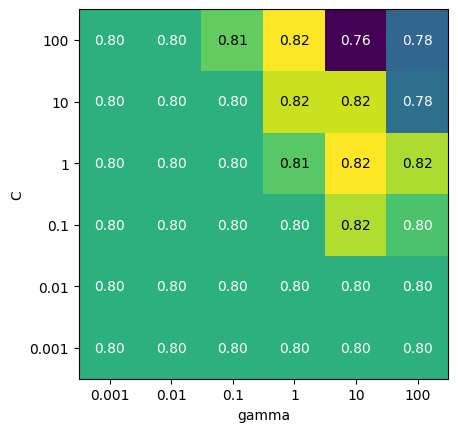

In [ ]:
scores = np.array(results.mean_test_score).reshape(6, 6)
# plot the mean cross-validation scores
mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'],
ylabel='C', yticklabels=param_grid['C'], cmap="viridis")

In [ ]:
#  Comparing the performance of a support vector machine (SVM) classifier with different hyperparameter settings
font = {'family' : 'monospace', 'weight' : 'bold', 'size'   : 14}
plt.rc('font', **font)
#plt.rcParams['figure.figsize'] = [35, 10]

def plot_params():
    fig, axes = plt.subplots(1, 3)
    for param_grid, ax in zip([param_grid_linear, param_grid_one_log,
                               param_grid_range], axes):
        grid_search = GridSearchCV(SVC(), param_grid, cv=5)
        grid_search.fit(X_train, y_train)
        scores = grid_search.cv_results_['mean_test_score'].reshape(6, 6)

        # plot the mean cross-validation scores
        scores_image = mglearn.tools.heatmap(scores, xlabel='gamma', ylabel='C', xticklabels=param_grid['gamma'],
                       yticklabels=param_grid['C'], cmap="viridis", ax=ax)
    plt.colorbar(scores_image, ax=axes.tolist())

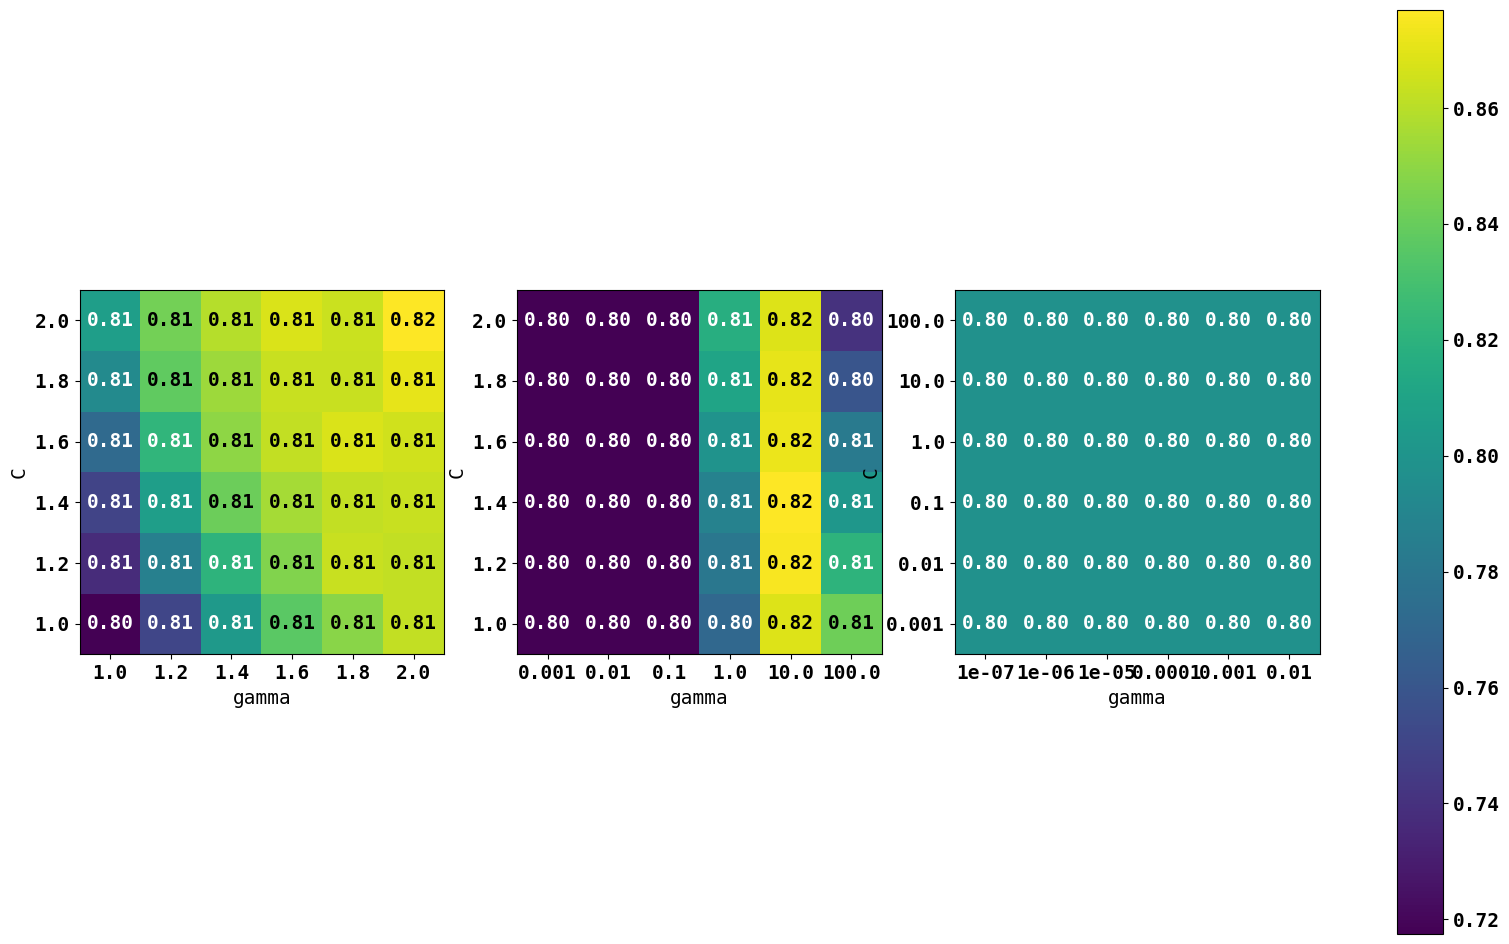

In [ ]:
plot_params()

##### Observation 8

- As observed, besides the best hyberparameter settings  { 'C': 1, 'gamma': 10 }, there are also other hyperparameter settings that may represent good model performance.
- Small gamma, under 1.0, will not be recommended as it does not bring good performance
- While the best estimation for C hyperparameter would be ranged between 1.0 - 2.0

Plot a ROC Curve

In [ ]:
font = {'family' : 'monospace', 'weight' : 'bold', 'size'   : 25}
plt.rc('font', **font)
plt.rcParams['figure.figsize'] = [20, 12]
plt.rcParams['lines.markersize'] = 20

In [ ]:
from sklearn.metrics import precision_recall_curve

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=98)

svc = SVC(C=1, gamma=10, probability=True).fit(X_train, y_train)

# Predict probabilities for the testing data
probs = svc.predict_proba(X_test)

#Compute precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))

# find threshold closest to zero
#close_zero = np.argmin(np.abs(thresholds))

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Compute the ROC curve and AUC score
fpr, tpr, thresholds_roc = roc_curve(y_test, probs[:, 1])
auc_score = roc_auc_score(y_test, probs[:, 1])

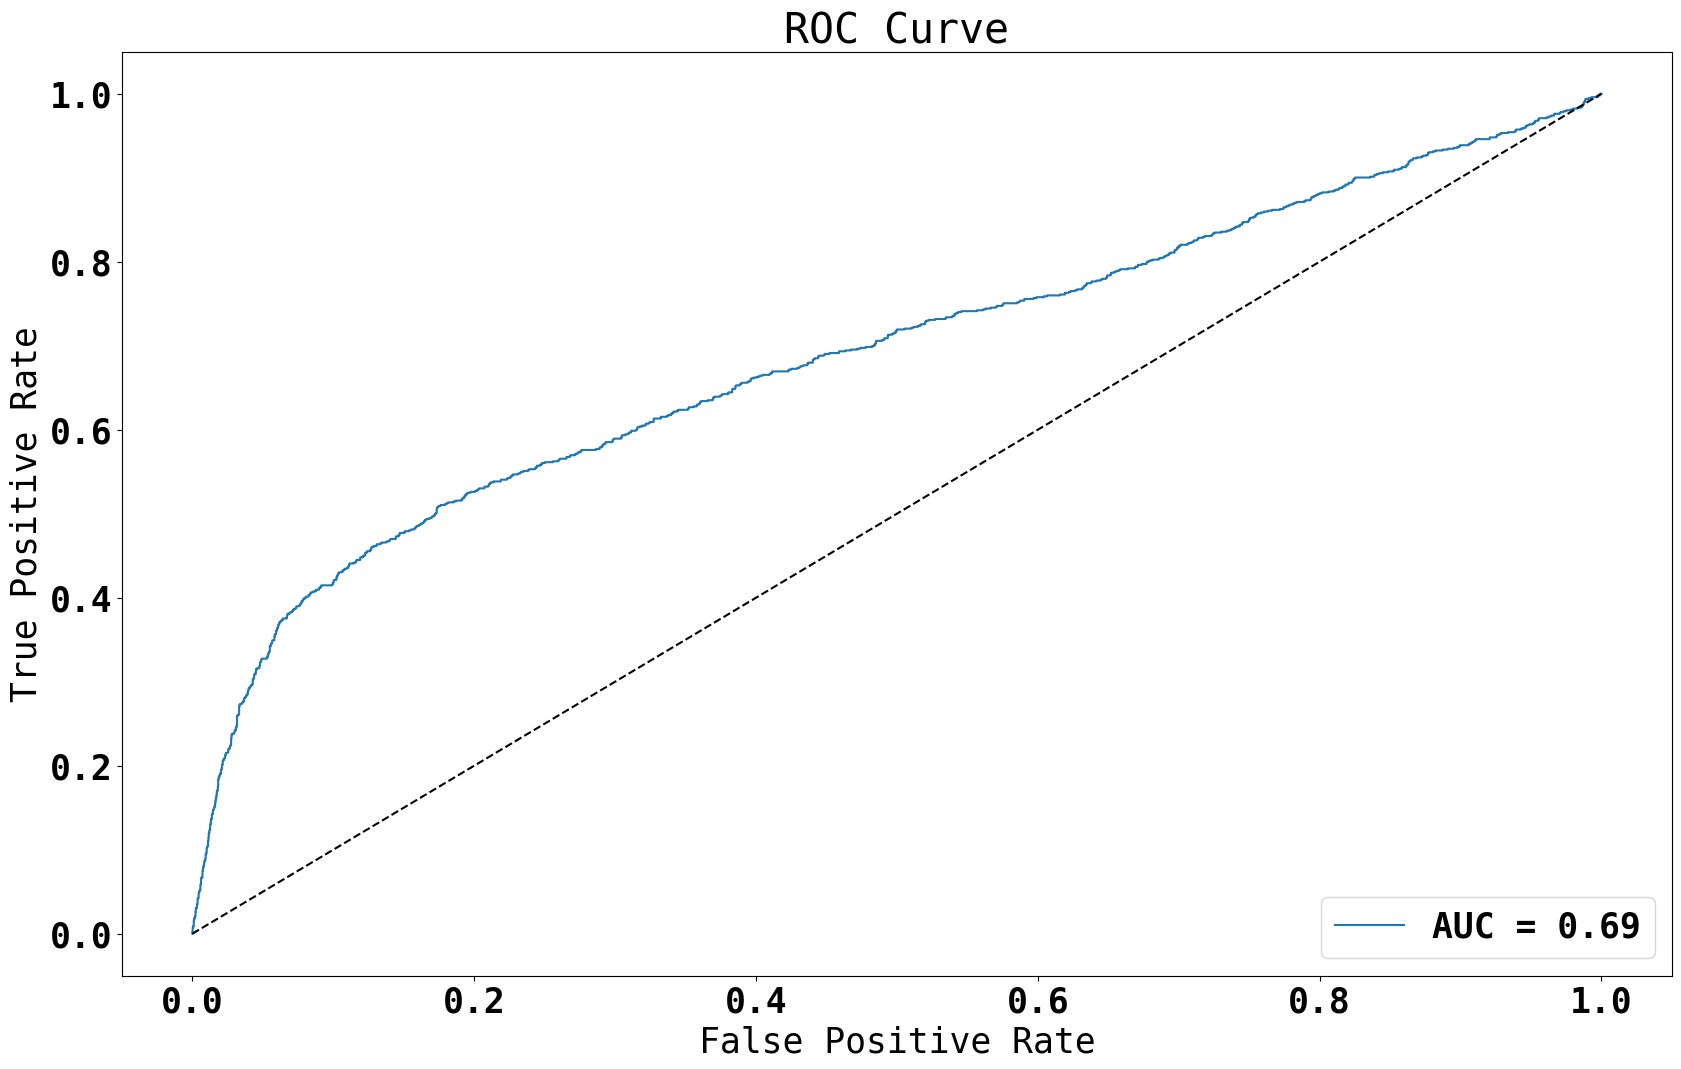

In [ ]:
# Plot the ROC curve
plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(auc_score))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

##### Observation 9
- An AUC of 0.69 indicates that the model has some discriminatory power but may not be ideal for all applications.
- Further analysis and fine-tuning of the model, including threshold selection, might be necessary to achieve the desired performance level.
- ROC plots True Positive Rate against the False Positive Rate at different thresholds, but we haven’t specified anything else about the thresholds themselve.
- A classifier assigns the predicted value to a class based on a threshold tells us that precision and recall are a trade-off (just like bias and variance). So we can plot the precision-recall curve to see the trade-off between them.

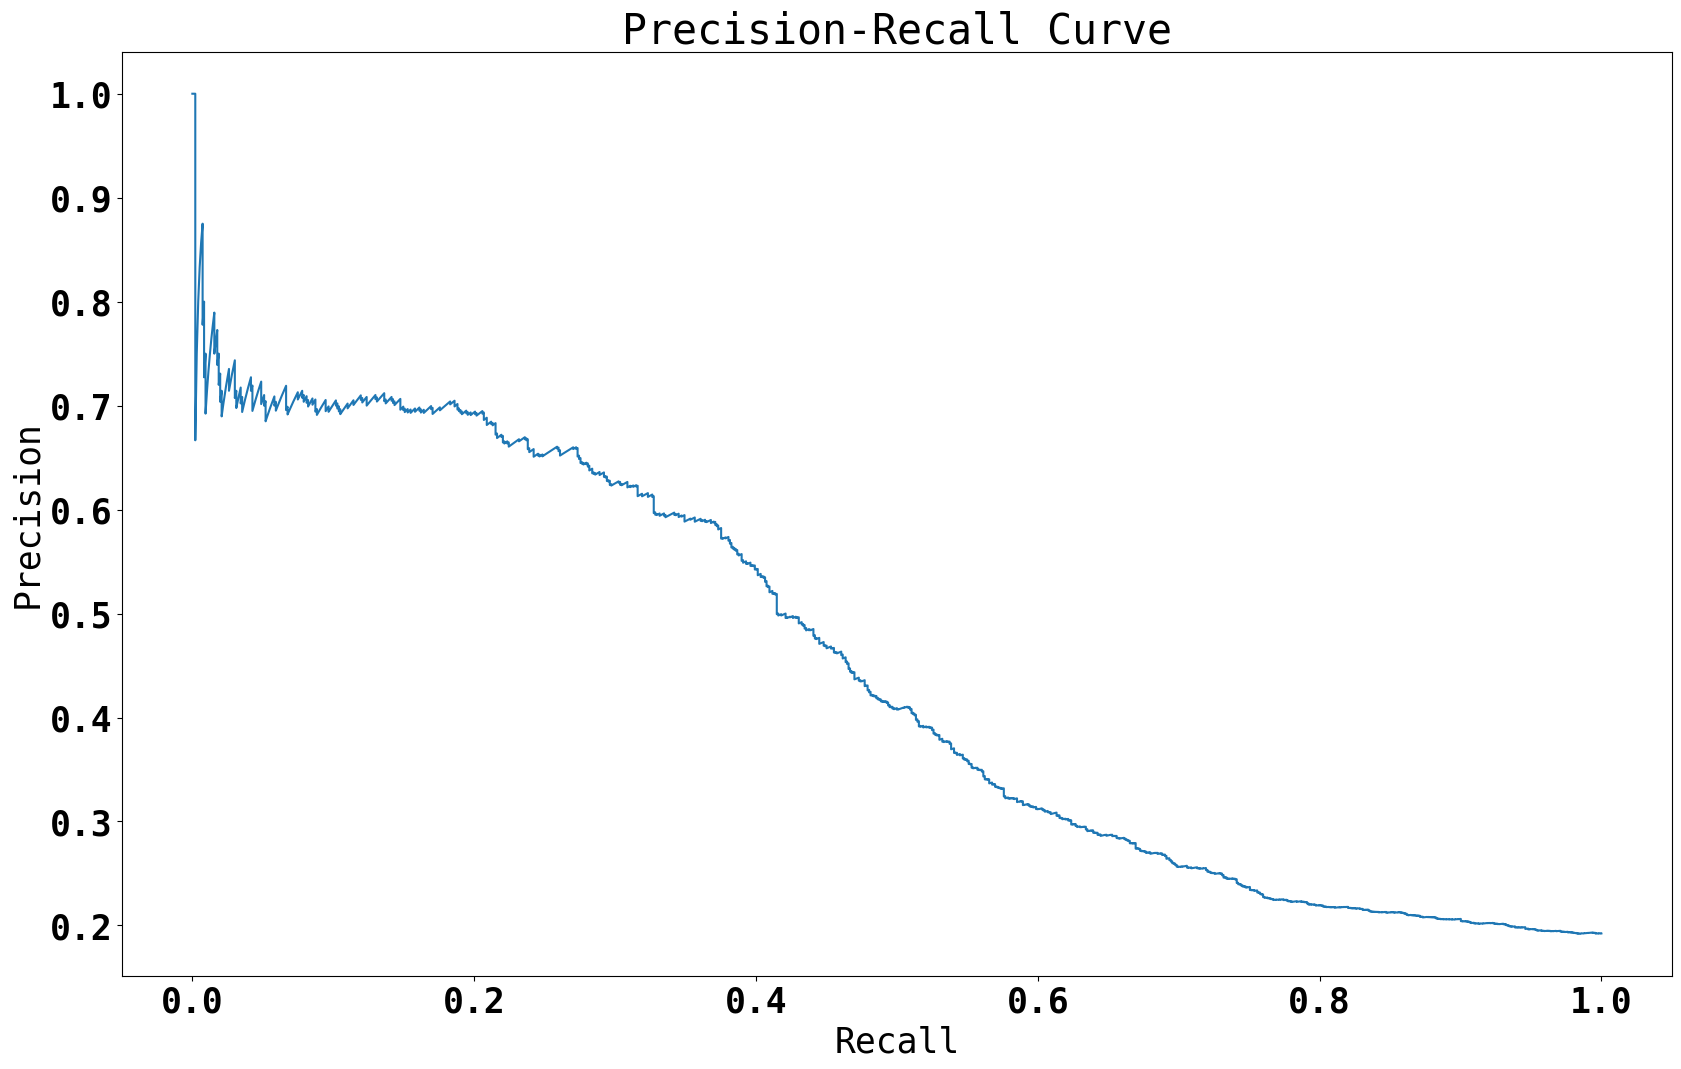

In [ ]:
# Plot the precision-recall curve
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

##### Observation 10
- The described behavior of the precision-recall curve above suggests that the model initially performs well, with a precision close to 1.0, but as the recall increases, the precision drops considerably. This could indicate a trade-off between precision and recall, where increasing one comes at the cost of decreasing the other.
- Another great way to visualize this tradeoff is to plot precision vs recall as the threshold varies. Using the same dataset, let's check what precision and recall trade-off is observed.

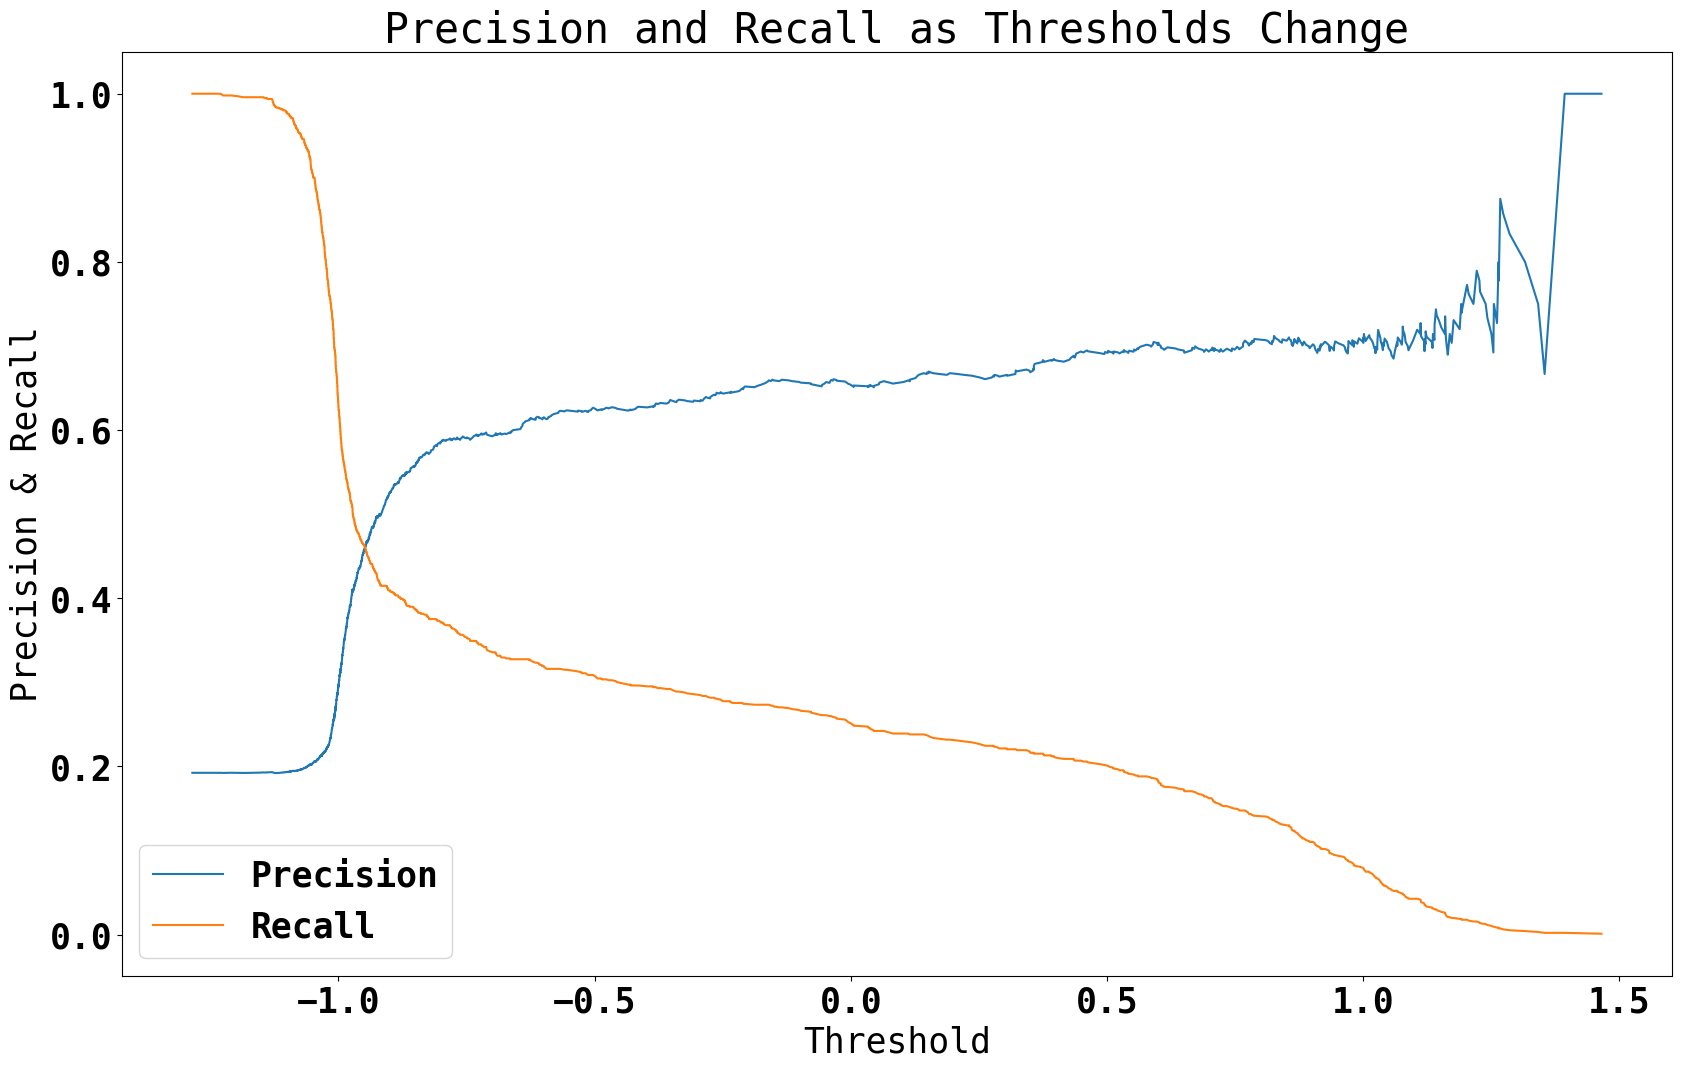

In [ ]:
# Plot precision and recall as thresholds change
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Precision & Recall')
plt.legend()
plt.title('Precision and Recall as Thresholds Change')
plt.show()

##### Observation 11
- The precision-recall curve is a graphical representation of how precision and recall values change as the classification threshold for a binary classifier varies.
- In binary classification, a threshold is used to convert the continuous probability scores predicted by a classifier into binary predictions (e.g., class 0 or class 1). By adjusting this threshold, we can control the trade-off between precision and recall.
- there is a trade-off between precision and recall. Increasing one metric often leads to a decrease in the other.
- When examining the precision-recall curve and varying the classification threshold, it was observed that there is a threshold value of approximately -0.9 where the balance between precision and recall is considered suitable. In other words, at this threshold, the classifier achieves a reasonable trade-off between making accurate positive predictions and capturing a substantial portion of the actual positive cases.
- After the threshold of around -0.9, further changes in the threshold result in precision and recall moving in opposite directions. This implies that adjusting the threshold beyond -0.9 would lead to a significant increase in one metric (e.g., precision) at the expense of the other (e.g., recall).
- Beyond this threshold, changes in the threshold values have a significant impact on precision and recall, causing them to move in opposite directions, which may not be desirable depending on the specific objectives of the classification task.
- According to this observation, it is recommendable to ultilize as small thresholds (close to 0 and beyond) to archive high precision rate and better accuracy in performance.

Let's use the same dataset as before, but fit the data to three different ML models.

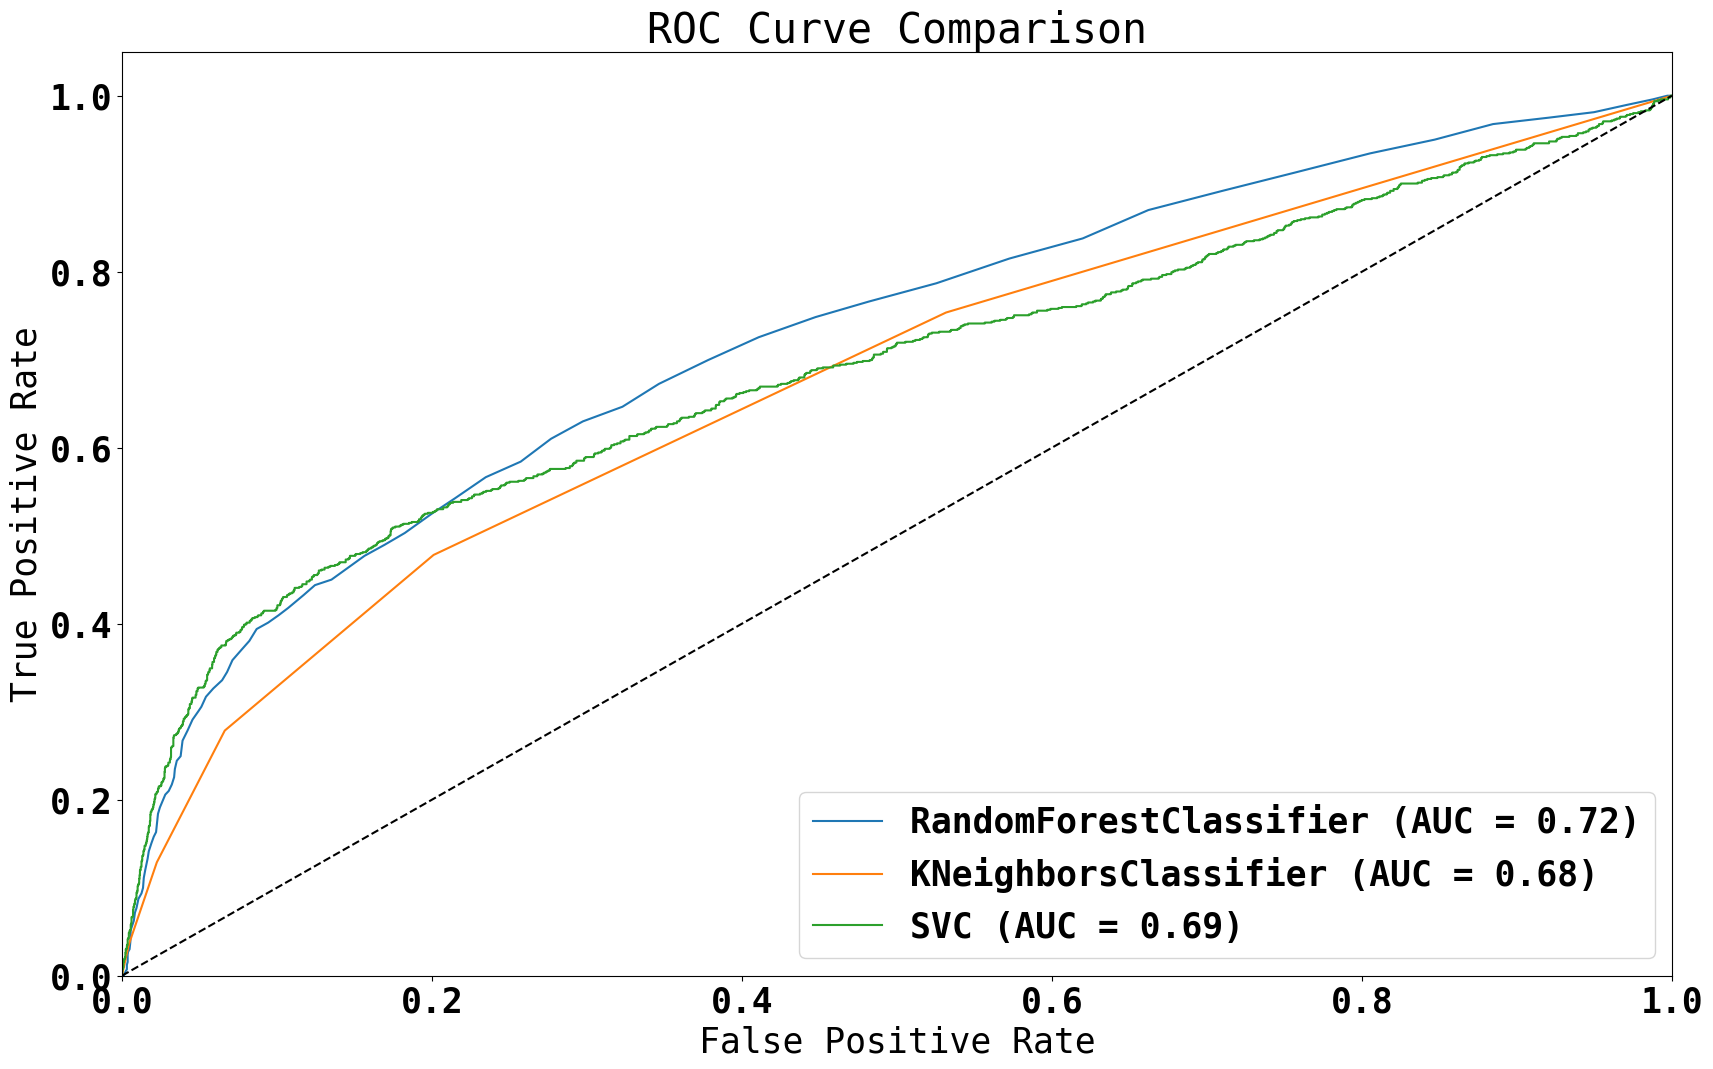

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Fit three different classifiers on the training data
clf1 = RandomForestClassifier(n_estimators=100)
clf2 = KNeighborsClassifier(n_neighbors=5)
clf3 = SVC(C=1, gamma=10, probability=True)
clfs = [clf1, clf2,clf3]

# Predict probabilities for the testing data
plt.figure()
for clf in clfs:
    clf.fit(X_train, y_train)
    probs = clf.predict_proba(X_test)
    fpr, tpr, _ = roc_curve(y_test, probs[:,1])
    auc_score = roc_auc_score(y_test, probs[:,1])
    plt.plot(fpr, tpr, label='{} (AUC = {:.2f})'.format(clf.__class__.__name__,
    auc_score))

# Plot the ROC/AUC curves for each classifier
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.show()

##### Observation 12
- RandomForestClassifier (AUC = 0.72):
  - The RandomForestClassifier is an ensemble machine learning algorithm based on decision trees. It constructs multiple decision trees and combines their predictions to make final predictions.
  - AUC = 0.72 suggests that the RandomForestClassifier achieved a relatively good level of discrimination between the positive and negative classes.
  - An AUC of 0.72 indicates that the model's ability to distinguish between the classes is better than random chance but may still have room for improvement.
  - The RandomForestClassifier achieved the highest AUC among the three, suggesting it may be the most effective classifier for this particular task
- KNeighborsClassifier (AUC = 0.68):
  - The KNeighborsClassifier is a type of instance-based or lazy learner algorithm used for classification. It makes predictions based on the majority class of its k nearest neighbors in the feature space.
  - AUC = 0.68 suggests that the KNeighborsClassifier achieved a moderate level of discrimination between the classes.
  - It indicates that the model's ability to distinguish between positive and negative cases is better than random chance but may not be as strong as the RandomForestClassifier
- SVC (AUC = 0.69):
  - The SVC (Support Vector Classifier) is a linear or nonlinear classifier that finds a hyperplane or decision boundary that best separates the classes in the feature space.
  - AUC = 0.69 suggests that the SVC achieved a reasonable level of discrimination between the classes.
  - It indicates that the model's ability to distinguish between the positive and negative classes is better than random chance but may not be as strong as the RandomForestClassifier

#### Limitations
This study has three main limitations.
- The first limitation is that outlier detection model has not been built to identify and flag data points that deviate significantly from the majority of the dataset. Some of the outliers has been removed during the Feature Selection but not thoroughly. Some ways to identify and handle outliers can be considered, such as:
  - Density-Based Methods: Density-based clustering algorithms like DBSCAN can identify outliers as data points that do not belong to any cluster.
  - IQR (Interquartile Range): The IQR is the range between the first quartile (Q1) and the third quartile (Q3) of the data. Data points outside the range [ Q1 - 1.5 * IQR, Q3 + 1.5 * IQR ] are often considered outliers.
  - Z-Score: The Z-score measures how many standard deviations a data point is from the mean. Data points with Z-scores exceeding a certain threshold (e.g., |Z| > 3) are considered outliers.
- The second limitation is that some of the key issues, such as processing Imbalance Class or Sparse Feature Vectors, have not been handled properly, even though small part of them has been improved through the Hyperparameter Tuning and Algorithm Selection. The reasons behind the shortage of computational processing are the time constraints and other resources such as computational capability, experience, energy, ect. However, recommendation on how to handle these issues properly and thoroughly will be conscientiously discussed below, under the Recommendation Suggestion section.
- The last limitation is the shortage of domain knowledge. Within limited time under tight schedule, it was limited to explore the deeper context behind the dataset, the requirement of the business needs or simply to ask for more questions related to these concerns. With better understanding, the selection between precision and recall, algorithm selection would be particularly improved.

#### Improvement Suggestions
Suggestions for Imbalanced Dataset Processing
  - Class Weights: we can assign different weights to the classes when calculating the loss to address class imbalance . In some machine learning libraries like scikit-learn, TensorFlow, or PyTorch, we can set class weights in the loss function to penalize misclassifications of the minority class more heavily.
  - Resampling: We can consider resampling techniques like oversampling the minority class or undersampling the majority class to balance the dataset before training your model.
    - Oversampling the Minority Class: Increasing the number of instances in the minority class by duplicating existing samples or generating synthetic samples (e.g., using SMOTE - Synthetic Minority Over-sampling Technique) can balance the dataset.
      - SMOTE (Synthetic Minority Over-sampling Technique) is an oversampling method that generates synthetic samples for the minority class.
      - ADASYN (Adaptive Synthetic Sampling):ADASYN is an adaptive oversampling technique that generates synthetic samples for the minority class based on the local density of instances. It focuses on regions of the feature space where the class imbalance is more pronounced.
    - Undersampling the Majority Class: Reducing the number of instances in the majority class by randomly selecting a subset of samples can also balance the dataset. Be cautious not to remove too many samples, as we might lose valuable information.
        - Cluster-Centroids: Cluster-Centroids is an undersampling technique that involves clustering the majority class instances and then replacing each cluster with its centroid.This method reduces the number of majority class instances while preserving the original distribution of the minority class. While simple, it can lead to a significant loss of information if oversimplified.
        - Tomek Links: Tomek links are pairs of instances in a dataset where each instance is the nearest neighbor of the other, but they belong to different classes.The presence of Tomek links indicates that these instances are near the decision boundary and may be noisy or misclassified. A common approach is to remove the majority class instance from each Tomek link, effectively creating a cleaner dataset.
    - Combination of oversampling and undersampling: SMOTE+Tomek Links combines oversampling with SMOTE and undersampling with Tomek links.  It first applies SMOTE to create synthetic minority samples and then removes Tomek links to clean the dataset.
    - Resampling with Replacement: This technique randomly oversamples the minority class by duplicating instances with replacement. It can be effective in increasing the representation of the minority class.
  - Different Algorithms: Use machine learning algorithms that are less sensitive to class imbalance. For example, ensemble methods like Random Forest and Gradient Boosting often perform well on imbalanced datasets. In the this experiment, we have use Random Forest algorithms and as a result, it gives the best performance, compared to other classification algoritms. Subsequently, we could try out the Gradient Boosting algorithms to see how it perform on imbalanced dataset and compare its performance with others.
  - Data Augmentation: Data augmentation techniques involve generating new samples from existing ones by applying transformations such as rotation, scaling, or translation. These augmented samples can help balance the dataset.
  - Feature Engineering: Carefully select and engineer features that are more discriminative for the minority class. Feature engineering can help the model better capture the characteristics of the minority class.
  - Threshold Adjustment: By default, classification algorithms use a threshold of 0.5 for binary classification. Adjusting this threshold can help achieve a better balance between precision and recall. We can optimize the threshold based on the problem's requirements.
  - Customized Loss Functions: Define custom loss functions that penalize misclassification of the minority class more severely.
  - Collect More Data: If possible, collect more data for the minority class. This can be the most effective solution, as it directly addresses the imbalance issue.
  - Domain Knowledge: Leverage domain knowledge to better understand the problem and guide the selection of appropriate strategies.

Suggestions for Classification Tasks
  - Curse of Dimensionality: High-dimensional data can lead to sparsity and difficulties in finding meaningful patterns. Feature reduction techniques like PCA (Principal Component Analysis) or feature selection can address this issue.
  - Consider the Problem Context: Think about the context of the classification problem will help us make better decision on what strategies to handle the imbalanced dataset and other factor related to the context of the task. What are the consequences and costs associated with false positives and false negatives? In some applications, precision (minimizing false positives) might be more critical, while in others, recall (capturing all true positives) might take precedence.
  - Analyze the Business Impact: Determine the impact of the chosen threshold on the business goals will also help us dramatically find ways to improve the final analytics results and model performance. For example, in medical diagnosis, missing a true positive (low recall) could be life-threatening, while in email spam classification, a few false positives (high precision) might inconvenience users but not be critical.
  - Evaluate the Balance between metrics: Different threshold suggests a balance between precision and recall. This means that, at this threshold, we are making trade-offs between correctly identifying positive cases and minimizing false alarms. However, Precision and recall are not the only metrics to consider, there are also other metrics like F1-score, ROC AUC, or other metrics that provide a more comprehensive view of model performance. Assess whether this balance aligns with the business objectives.
  - Ethical Considerations: Be aware of potential bias in the dataset and model predictions, and take steps to mitigate bias if necessary. Ensure that our classification model complies with ethical guidelines.

Suggestions for Sparse Feature Vectors

Handling sparse feature vectors is a common challenge in machine learning, especially when dealing with high-dimensional data or natural language processing (NLP) tasks. Sparse feature vectors are characterized by having a large number of features, with most of them having zero values.

Here are some suggestions for sparse feature vectors:
- Regularization Techniques: Consider using regularization techniques like L1 regularization (Lasso) during model training. L1 regularization encourages sparsity by shrinking some feature weights to exactly zero.
- Feature Scaling: Apply feature scaling, such as min-max scaling or z-score normalization, to the non-zero values in the sparse feature vectors. This ensures that features have similar scales and can improve model convergence
- Feature Transformation: Apply dimensionality reduction techniques like Principal Component Analysis (PCA) or Truncated Singular Value Decomposition (SVD) to reduce the dimensionality of the data while preserving its important information.
- Sparse Matrix Representation: Utilize sparse matrix representations like Compressed Sparse Column (CSC) or Compressed Sparse Row (CSR) formats to store and process sparse data efficiently. Popular libraries like SciPy in Python provide support for sparse matrices.
- Sparse-Aware Algorithms: Choose machine learning algorithms that are inherently sparse-aware. For example, linear models like Logistic Regression and Linear Support Vector Machines (SVM) can handle sparse data efficiently.
- Feature Hashing:Implement feature hashing (also known as the "hashing trick") to convert categorical features into a fixed-dimensional space. This reduces the dimensionality of categorical features and can be useful in NLP tasks.